In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
np.random.seed(0)

In [ ]:
# M = 200  # Nombre de trajectoires
# N = 1000 # Durée totale (en s)
# T = np.arange(N)  # Indices des temps
# c = 0.025  # Débit d'argent rentrant (en €/s)
# lambda_T = 0.1  # Paramètre de la loi de Poisson pour les durées entre sinistres
# lambda_X = 1  # Paramètre de la loi de Poisson pour le montant des sinistres
# n_samples_per_time_unit = 1 + int(lambda_T + 5 * np.sqrt(lambda_T))  # Taille du tableau des sinistres
# dN = np.hstack((np.zeros((M, 1)), np.random.poisson(lambda_T, (M, N - 1))))
# X = np.random.exponential(1 / lambda_X, (M, N, n_samples_per_time_unit))
# dS = np.sum((np.arange(n_samples_per_time_unit) < dN.reshape(M, N, 1)) * X, axis=2)
# S = np.cumsum(dS, axis=1)

# u = 1 + c * T - S
# u_alive = ~np.cumsum(u<0, axis=1).astype(bool)
# u_cutted = u*(u_alive)

In [92]:
def phi_former(n):
    u0 = 1
    M = 100  # Nombre de trajectoires
    N = 100 # Durée totale (en s)
    T = np.arange(N)  # Indices des temps
    c = 1  # Débit d'argent rentrant (en €/tour)
    # n_joueurs = 1
    lam = 1 / (n + 1)
    # dS = n * np.random.poisson(n_joueurs * lam, (M, N))
    dS = n * np.random.poisson(lam, (M, N))
    S = np.cumsum(dS, axis=1)
    # u = u0 + n_joueurs * c * T - S
    u = u0 + c * T - S
    u_alive = ~np.cumsum(u<0, axis=1).astype(bool)
    u_cutted = u*(u_alive)
    phi = np.mean(u_alive, axis=0)
    # plt.title("Évolution des réserves monétaires avec accidents à couvrir")
    # plt.xlabel("temps (en s)")
    # plt.ylabel("trésorerie (en €)")
    # plt.plot(u.T, c='gray')
    # plt.plot(u_cutted.T)
    # plt.show()
    # plt.title("Probabilité de non-ruine")
    # plt.xlabel("temps (en s)")
    # plt.ylabel("probabilité")
    # plt.plot(phi)
    # plt.show()
    # plt.title("Probabilité de non-ruine")
    # plt.xlabel("temps (en s)")
    # plt.ylabel("probabilité (log)")
    # plt.plot(np.log(phi))
    # plt.show()
    return phi[-1]

In [257]:
def phi(u0, n):
    M = 50  # Nombre de trajectoires
    N = 2000 # Durée totale (en s)
    T = np.arange(N)  # Indices des temps
    c = 1  # Débit d'argent rentrant (en €/tour)
    lam = 1 / (n + 1)
    dS = np.hstack((np.zeros((M, 1)), n * (np.random.random((M, N - 1)) < lam)))
    S = np.cumsum(dS, axis=1)
    u = u0 + c * T - S
    u_alive = ~np.cumsum(u<=0, axis=1).astype(bool)
    # u_cutted = u*(u_alive)
    phi = np.mean(u_alive, axis=0)
    # plt.title("Évolution des réserves monétaires avec accidents à couvrir")
    # plt.xlabel("temps (en s)")
    # plt.ylabel("trésorerie (en €)")
    # plt.plot(u.T, c='gray')
    # plt.plot(u_cutted.T)
    # plt.show()
    # plt.title("Probabilité de non-ruine")
    # plt.xlabel("temps (en s)")
    # plt.ylabel("probabilité")
    # plt.plot(phi)
    # plt.show()
    # plt.title("Probabilité de non-ruine")
    # plt.xlabel("temps (en s)")
    # plt.ylabel("probabilité (log)")
    # plt.plot(np.log(phi))
    # plt.show()
    return phi[-1]

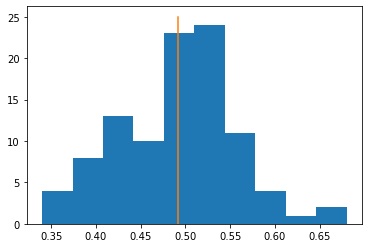

In [258]:
vphi = np.vectorize(phi)
expt = vphi(1, 2 * np.ones(100))
plt.hist(expt)
phi_inf = np.mean(expt)
plt.plot([phi_inf, phi_inf], [0, 25])
plt.show()

In [259]:
def phi_inf(u0, n):
    return np.mean(vphi(u0, n * np.ones(100)))

In [260]:
v_inf = np.vectorize(phi_inf)

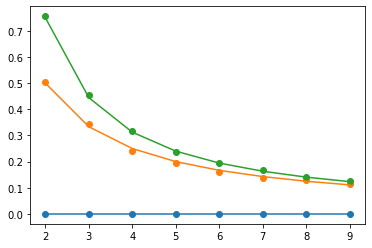

In [269]:
n_abscisse = np.arange(2, 10)
r_ord0 = v_inf(0, n_abscisse)
r_ord1 = v_inf(1, n_abscisse)
r_ord2 = v_inf(2, n_abscisse)

plt.scatter(n_abscisse, r_ord0)
plt.scatter(n_abscisse, r_ord1)
plt.scatter(n_abscisse, r_ord2)

plt.plot(n_abscisse, 0 / n_abscisse ** 0)
plt.plot(n_abscisse, 1 / n_abscisse ** 1)
plt.plot(n_abscisse, (n_abscisse + 1) / n_abscisse**2)

plt.show()

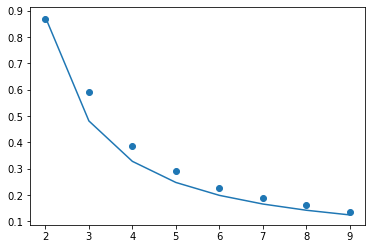

In [268]:
n_abscisse = np.arange(2, 10)
r_ord3 = v_inf(3, n_abscisse)
plt.scatter(n_abscisse, r_ord3)
plt.plot(n_abscisse, (n_abscisse**2 + n_abscisse + 1) / n_abscisse**3)
plt.show()